In [101]:
"""
Author: Juan A. Puyo 202123385
"""

import numpy as np
import matplotlib.pyplot as plt

In [102]:
""" 
Parámetros libres del problema, se pueden modificar acorde a lo requerido.
"""

"Longitud de la región en x."
a=15
"Longitud de la región en y."
b=10
"Tamaño de los pasos (dx=dy)."
h=0.5
"Número de puntos en x, se añade 1 porque tambien debe incluir el punto inicial."
Nx=int(a//h)+1
"Número de puntos en y, se añade 1 porque tambien debe incluir el punto inicial."
Ny=int(b//h)+1
"""
Notese que, es preferible escoger el tamaño del paso h
para que al hacer la división por a o por b, este 
termine arrojando un número entero. En caso contrario 
se toma por defecto la parte entera de dicho cociente. 
Ahora, se va a definir la variable v0 que corresponde
al voltaje inicial en las fronteras dada la condición
del taller 3. Se le asigna un valor
arbitrario en este caso de 5V.
"""
v0= 5
"""
En la siguiente función, se va a construir una matriz con
las condiciones iniciales para el voltaje de la región,
incluyendo las de frontera. Para otros casos esta matriz
debe ser modificada.
"""
def V_0(Nx,Ny,v0):
    Vo=np.zeros((Nx,Ny))
    Vo[:,0]= -v0*np.ones(Nx)
    Vo[:,-1]= v0*np.ones(Nx)

    return Vo

In [103]:
"""
En esta función, vamos a definir el método de relajación, es decir vamos
a calcular los valores del potencial en todos los puntos de la rejilla interna
dada la propiedad del valor promedio, sin alterar las condiciones de frontera.
"""

def relaja(Nx,Ny,Vo):
    """
    Para garantizar que las condiciones de frontera no se alteren,
    se define una nueva variable Vnew sobre la cual se va a aplicar 
    el método de relajación. La variable Vold cobrará sentido más adelante.
    """
    Vold=Vo
    Vnew=Vold
    """ 
    Además, en los for loops se arranca desde 1 para no iterar sobre la frontera
    sino solo sobre el interior.
    """
    for xi in range(1,Nx-1):
        for yj in range (1,Ny-1):
            Vnew[xi,yj]= (Vnew[xi+1,yj]+Vnew[xi-1,yj]+Vnew[xi,yj+1]+Vnew[xi,yj-1])/4

    return Vnew, Vold

""" 
La función cambio_p lo único que hace es medir que tanto cambian los valores
en promedio de la matriz antigua (Vold) con respecto a la nueva (Vnew), despues 
de realizar la relajación. Esto va a ser útil a la hora de saber cuando nuestra
solución se haya estabilizado y no se requieran más iteraciones. Nota: en caso
de que la solución no converja, hay un problemita que ya solucionaremos más
adelante ;).
"""
def cambio_p(Vold,Vnew):
    Vchange=Vnew-Vold
    return np.average(Vchange)

In [104]:
""" 
En esta última función se obtiene el voltaje final en la región
aplicando el método de relajación múltiples veces. Como se puede ver,
tenemos una variable de entrada llamada tolerancia y otra llamada iter_max,
estas dos variables se encargan de evaluar cuando las variaciones de 
los valores de voltaje en la región se han estabilizado para parar las
iteraciones. 
"""

def obtener_V(Nx,Ny,Vo,tolerancia=0.1,iter_max=1e3):

    iter=0
    seguir=True
    Vnew=np.zeros((Nx,Ny))
    Vold=np.zeros((Nx,Ny))
    change=1
    while iter != iter_max and seguir:
        Vnew,Vold=relaja(Nx,Ny,Vo)
        change_new=cambio_p(Vold,Vnew)
        if np.abs(change-change_new)/change < tolerancia:
            seguir=False
        change=change_new 
        
        iter += 1

    
    return Vnew, iter

In [105]:
V,itera=obtener_V(Nx,Ny,V_0(Nx,Ny,v0))
print(itera)

1000


<ipython-input-104-d55d959bbccb>:20: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(change-change_new)/change < tolerancia:


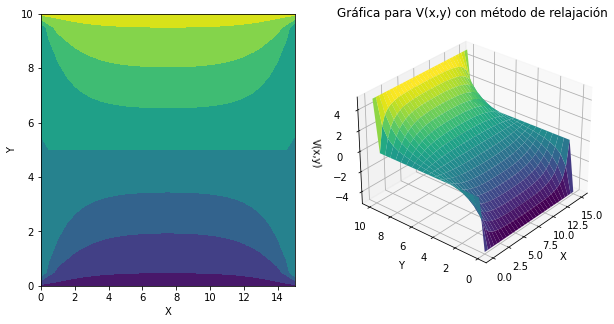

In [114]:
""" 
Código para gráficar la solución numérica.
"""
x=np.linspace(0,a,Nx)
y=np.linspace(0,b,Ny)

yy,xx= np.meshgrid(y,x)

fig = plt.figure(figsize=(10,5))
ax0=fig.add_subplot(121)
ax0.contourf(xx,yy,V,cmap="viridis")
ax0.set_xlabel("X")
ax0.set_ylabel("Y")


ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xx, yy, V, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('V(x,y)')
ax1.set_title('Gráfica para V(x,y) con método de relajación')

ax1.view_init(elev=30, azim=220)
plt.show()

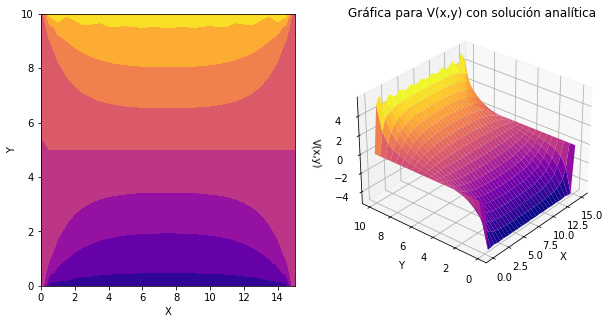

In [116]:
""" 
Esta es la función que nos construye la solución analítica calculada en el informe, 
la cuál se trunca hasta los primeros 100 términos por defecto. Nota: intentar no pasarse de
200 términos, ya que el computador empieza a tener problemas de overflow debido a la
representación numérica máxima de los float, por lo que no arroja un resultado adecuado.
"""
def V_analit (x,y, v,a,b,N=100):
    "f define cana n-ésimo término individualmente"
    f= lambda x,y,n: (2 * v * ((-1)**n -1))/(np.pi* n)* np.sin((n* np.pi * x)/(a))*(np.cosh((n *np.pi *y)/(a)) - 
            ( (np.tanh((n *np.pi *b)/(a)))**(-1)+ (np.sinh((n *np.pi * b)/(a)))**(-1)) * np.sinh((n * np.pi * y)/(a)))
    V_a=0
    "este cíclo for suma todos los terminos individuales hasta N."
    for n in range (1,N+1):
        V_a +=f(x,y,n) 
    return V_a

""" 
Código para graficar la solución analítica.
"""

fig = plt.figure(figsize=(10,5))
ax2=fig.add_subplot(121)
ax2.contourf(xx,yy,V_analit(xx,yy,v0,a=a,b=b,N=200),cmap="plasma")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

ax3 = fig.add_subplot(122, projection='3d')
ax3.plot_surface(xx, yy, V_analit(xx,yy,v0,a=a,b=b,N=200), cmap='plasma')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('V(x,y)')
ax3.set_title('Gráfica para V(x,y) con solución analítica')
ax3.view_init(elev=30, azim=220)
plt.show()

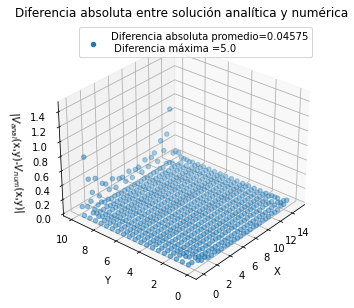

In [132]:
fig = plt.figure(figsize=(10,5))


ax5 = fig.add_subplot(111, projection='3d')
ax5.scatter(xx, yy, np.abs(V_analit(xx,yy,v0,a=a,b=b,N=200)-V), cmap='plasma'
            ,label="Diferencia absoluta promedio="
            +str(round(np.average(np.abs(V_analit(xx,yy,v0,a=a,b=b,N=200)-V)),5))
            +"\n Diferencia máxima ="+str(round(np.max(np.abs(V_analit(xx,yy,v0,a=a,b=b,N=200)-V)),5)))
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('|$V_{anal}$(x,y)-$V_{num}$(x,y)|')
ax5.set_zlim3d((0,1.5))
ax5.set_title('Diferencia absoluta entre solución analítica y numérica')
ax5.view_init(elev=30, azim=220)
ax5.legend()
plt.show()